# PRINCIPAL COMPONENT ANALYSIS

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA



### Prepare the Data

In [24]:
data = pd.read_csv('Data/Pokemon.csv')  # Read the CSV file
data.drop(columns=['#', 'Total'], inplace=True) # Drop no relevant columns
X = data.iloc[:,3:9] # Choose the columns of our interest
X.head()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,45,49,49,65,65,45
1,60,62,63,80,80,60
2,80,82,83,100,100,80
3,80,100,123,122,120,80
4,39,52,43,60,50,65


### Apply Standard Scaler to the data

In [25]:
sc = StandardScaler()
X = pd.DataFrame(sc.fit_transform(X), columns=X.columns)


### Set the PCA components, and define the "V" and "U" Dataframes for the plot

In [26]:
pca = PCA(n_components=4)
pca.fit(X)

''' 
if you want to understand what is underlaying here check this code:
    V = pca.components_ # This return us the V  matrix from the Singular Values Decomposition (SVD)
    V = pd.DataFrame(V, columns=X.columns) # Create a Dataframe with that values and the same name columns of X
    U = pca.transform(X) # This return a U matrix where every observation (row) is calculated by the Principal Comonents
    U = pd.DataFrame(U.round(2), columns=["PC1","PC2","PC3","PC4"]) # Create the Dataframe  with this columns names
    U["Generation"] =d ata.Generation # Add generation column from our dataframe

'''

' \nif you want to understand what is underlaying here check this code:\n    V = pca.components_ # This return us the V  matrix from the Singular Values Decomposition (SVD)\n    V = pd.DataFrame(V, columns=X.columns) # Create a Dataframe with that values and the same name columns of X\n    U = pca.transform(X) # This return a U matrix where every observation (row) is calculated by the Principal Comonents\n    U = pd.DataFrame(U.round(2), columns=["PC1","PC2","PC3","PC4"]) # Create the Dataframe  with this columns names\n    U["Generation"] =d ata.Generation # Add generation column from our dataframe\n\n'

In [27]:
### Define the pca_results and biplot function, as python hasn't (R has buit in functions for pca results)

In [28]:
def pca_results(data, pca):   
    """
    data: Scaled data
    pca: pca object
    """
    # Dimension indexing
    dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]  
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys())
    components.index = dimensions
    
    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions
    
    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar', cmap='viridis')
    ax.set_ylabel("Feature Weights") 
    ax.set_xticklabels(dimensions, rotation=0)

    # Display the explained variance ratios# 
    for i, ev in enumerate(pca.explained_variance_ratio_): 
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

In [29]:
def biplot(data, reduced_data, pca):
    
    fig, ax = plt.subplots(figsize = (14,8))
    
    # scatterplot of the reduced data 
    ax.scatter(x=reduced_data.loc[:, 'Dimension 1'], y=reduced_data.loc[:, 'Dimension 2'], facecolors='g', edgecolors='g', s=70, alpha=0.5)
    
    feature_vectors = pca.components_.T
    # using scaling factors to make the arrows
    arrow_size, text_pos = 7.0, 8.0,
    # projections of the original features
    for i, v in enumerate(feature_vectors):
        ax.arrow(0, 0, arrow_size*v[0], arrow_size*v[1], head_width=0.2, head_length=0.2, linewidth=2, color='red')
        ax.text(v[0]*text_pos, v[1]*text_pos, data.columns[i], color='black', ha='center', va='center', fontsize=18)

    ax.set_xlabel("Dimension 1", fontsize=14)
    ax.set_ylabel("Dimension 2", fontsize=14)
    ax.set_title("PC plane with original feature projections.", fontsize=16);
    return ax

### Call the pca_result function return us the weights of each direction. But not return us the real directión

,Explained Variance,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Dimension 1,0.4519,0.3899,0.4393,0.3637,0.4572,0.4486,0.3354
Dimension 2,0.1823,-0.0848,0.0118,-0.6288,0.3054,-0.2391,0.6685
Dimension 3,0.1298,0.4719,0.5942,-0.0693,-0.3056,-0.5656,-0.0785
Dimension 4,0.1201,0.7177,-0.4058,-0.4192,0.1475,0.1854,-0.2972


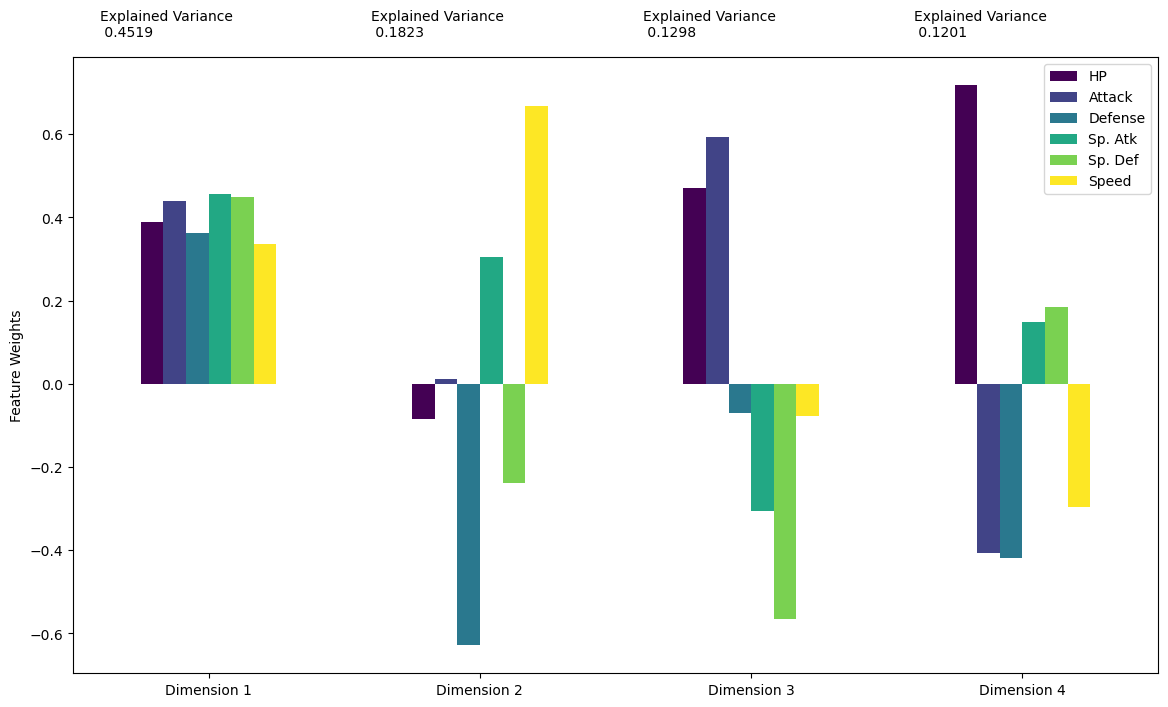

In [30]:
pca = pca.fit(X) 
pca_results(X, pca)


### Prepare the Data to call biplot function

In [31]:
pca = PCA(n_components =2)
U2D = pca.fit_transform(X) # Must be a Dataframe
U2D = pd.DataFrame(U2D, columns =['Dimension 1', 'Dimension 2'] )

### The Biplot function returns us the direcctions and the weights

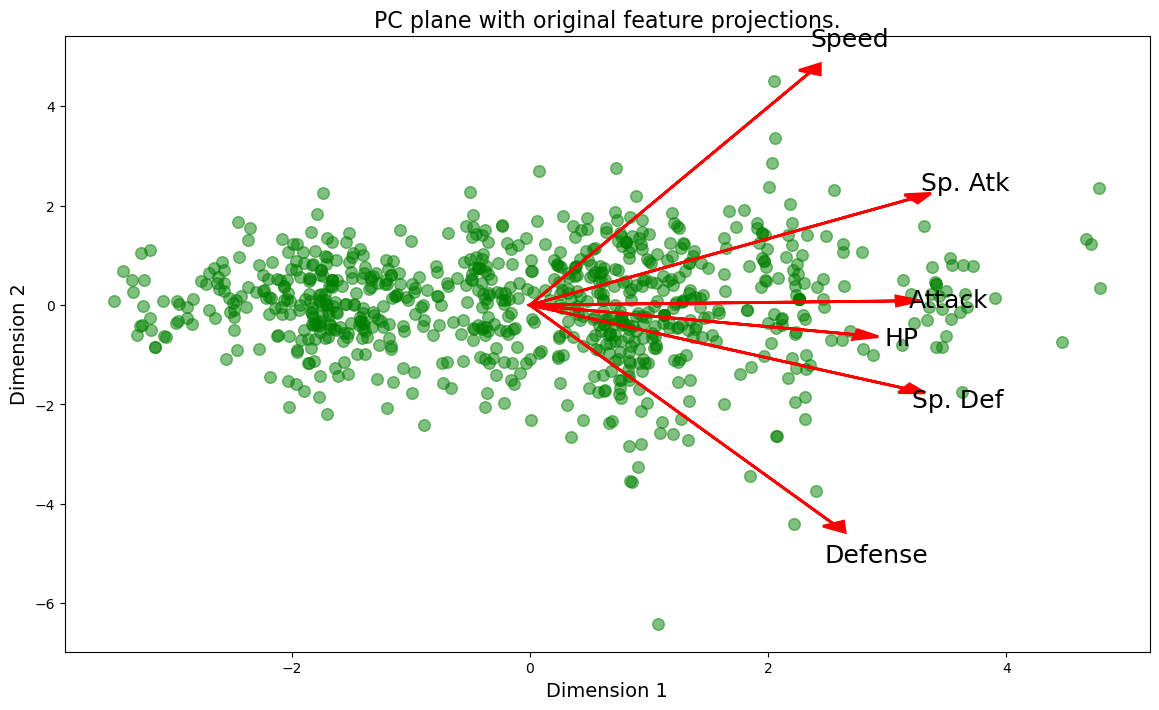

In [32]:
biplot(X, U2D, pca)
plt.show()

[0.45190665 0.63416023 0.76395109 0.88406197]


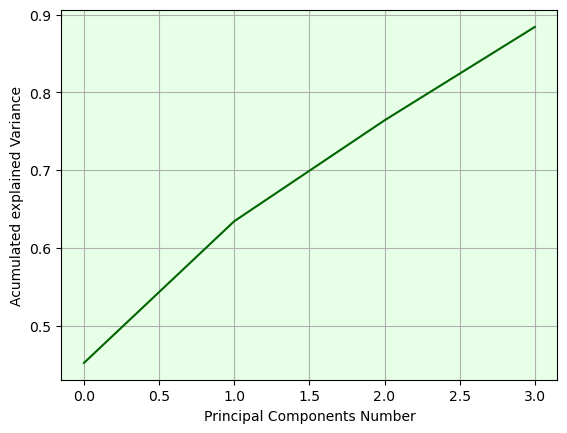

In [35]:
pca = PCA(n_components =4).fit(X)
print(np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color= 'darkgreen')
plt.gca().set_facecolor('#e6ffe6') 
plt.xlabel('Principal Components Number')
plt.ylabel('Acumulated explained Variance')
plt.grid(True)
plt.show()
